<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Práctica 2</h1>
            <h2>Limpieza y análisis de datos</h2>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Tipología y ciclo de vida de los datos (M2.851)</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autores: Martín Leal, Eugenio Peñalver <span style="margin-left: 30px;">Profesora: Mireia Calvo</span></div>
        </div>
    </div>
</div>
<!--/Header-->

Hemos decidido realizar la actividad con el conjunto de datos correspondiente a la competición [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) de [Kaggle](https://www.kaggle.com/).

Es un dataset que en términos generales viene muy limpio, por lo que los movimientos que se van a hacer van a ser más para adecuar los datos a los modelos que por simple limpieza del dataset.

## Librerias y carga del dataset

In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
import re as re
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

warnings.filterwarnings('ignore')
sns.set_palette('pastel')

In [2]:
df = pd.read_csv('data/train.csv', header = 0)

## Observación de los datos

Comenzamos por realizar una visualización simple del conjunto de datos para ir viendo que tenemos entre manos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que nuestro dataset consta de 12 atributos de los cuales (`Age`, `Cabin` y `Embarked`) tienen valores _NA_.

La variable a predecir o _target_ del estudio es `Survived`, con este conjunto de datos se va a ver si los atributos de los pasajeros determinan si tienen mayor o menor tasa de supervivencia.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploración de los datos

Llegados a este punto vamos a ir variable a variable, visualizándola y transformándola para preparar el conjunto de datos para poder aplicar modelos que nos permitan sacar conclusiones sobre el mismo.

El análisis de las variables lo iremos relacionando con la variable __Survived__ dado que es la variable objetivo del análisis y es importante ver como se comportan las variables respecto a ella.

### PassengerId

In [6]:
df['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

Esta variable encierra el _id_ que se le ha dado a cada uno de los pasajeros, no tiene ningún valor predictivo por lo que decidmos prescindir de ella.

In [7]:
df.drop(['PassengerId'], axis=1, inplace=True)

### Survived

In [8]:
df.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived'>

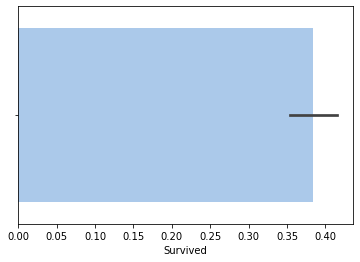

In [9]:
sns.barplot(x="Survived", data=df)

Esta es la variable _target_ a la hora de realizar las predicciones, binaria donde indica con un __1__ el superviviente y con un __0__ quien no lo consiguió.

Observamos que alrededor de un 38% de los pasajeros sobrevivieron al acccidente.

### Pclass

In [10]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Esta variable indica en que clase estaba hospedada la persona, es una variable categórica con 3 niveles diferentes:

+ Primera clase
+ Segunda clase
+ Tercera clase

Observamos que tiene correlación con el _target_, vemos que cuanta más alta la clase, más supervivientes.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

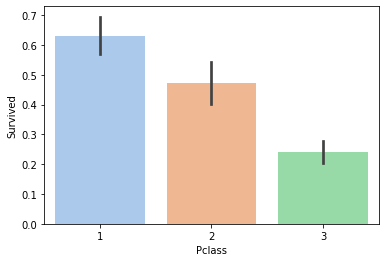

In [11]:
sns.barplot(x="Pclass", y="Survived", data=df)

### Name

Esta variable no nos aporta información relevante, dado que el nombre no aporta ningún tipo de valor predictivo.

Observamos que aparece el título de cada persona acompañado por su nombre, vamos a parsear la variable, aislando los títulos y creando una nueva variable.

Consideramos que puede tener algún valor predictivo.

In [12]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df['Title'] = df['Name'].apply(get_title)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Hay muchos títulos, nos vamos a quedar con los más usados y los demás los vamos a encarcar de una categoría que denominaremos _Other_.

In [13]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


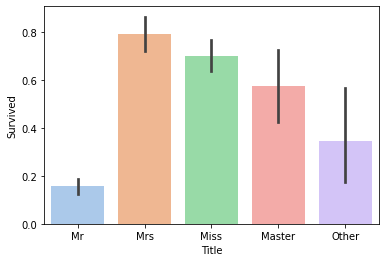

In [14]:
sns.barplot(x="Title", y="Survived", data=df)
df.drop(['Name'], axis=1, inplace=True)

Vemos pues, cómo se dio prioridad a las mujeres a la hora de abandonar el barco.

### Sex

Variable categórica con valores _male_ y _female_, vamos a ver que información arroja:

In [15]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

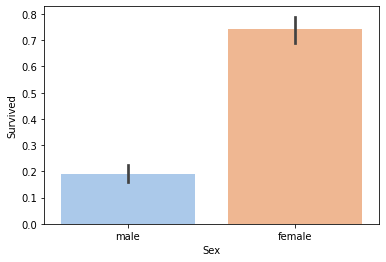

In [16]:
sns.barplot(x="Sex", y="Survived", data=df)

Para no tener problemas luego a la hora de aplicar los modelos vamos a binarizar la variable:

In [17]:
df['Sex'] = df['Sex'] == 'male'

### Age

Una de las variables en las que tenemos un problema de _NAN value_, dado que tiene muchos números y puede ser confuso o aportar pocco valor al análisis, vamos a categorizar esta variable dándo a los NA una categoría _Unknown_.

In [18]:
df["Age"] = df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df["Age"], bins, labels = labels)

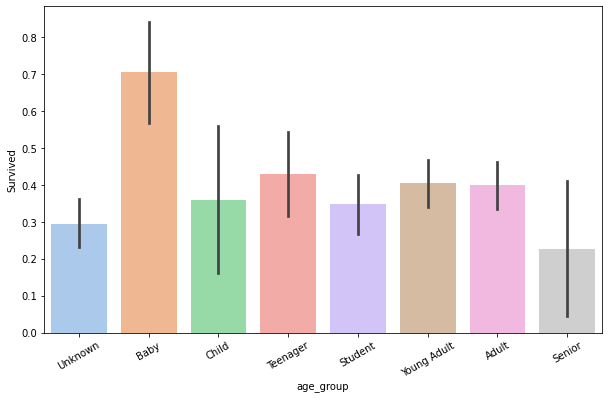

In [19]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x="age_group", y="Survived", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
df.drop(['Age'], axis=1, inplace=True)

Vemos como la máxima de _los bebes primero_ se cumplió en este desastre, siendo el rango de edad con mayor tasa de supervivencia, cerca del __70 %__

### SibSp

Vemos en la documentación que es el número de hermanos o cónyuges del pasajero en el mismo trayecto, variable numérica.

In [20]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

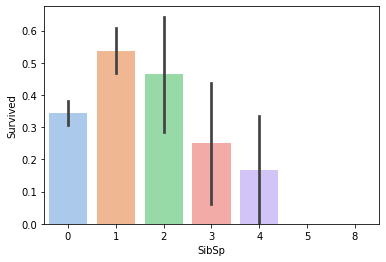

In [21]:
sns.barplot(x="SibSp", y="Survived", data=df)

### Parch

Vemos en la documentación que es el número de padres o hijos del pasajero en el mismo trayecto, variable numérica.

In [22]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

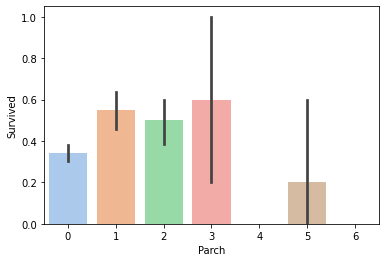

In [23]:
sns.barplot(x="Parch", y="Survived", data=df)

### Ticket

Una variable como la primera que marcaba el _id_ del pasajero, la vamos a droppear también dado que no aporta nada a los modelos predictivos.

In [24]:
df.drop(['Ticket'], axis=1, inplace=True)

### Fare

La variable que contiene los precios de los billetes, variable númerica contínua, la vamos a representar gráficamente para ver si se distribuye con __normalidad__.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

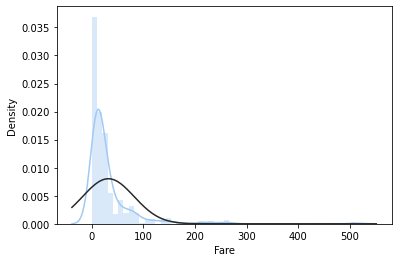

In [25]:
sns.distplot(df['Fare'], fit = norm)

La varible está lejos de seguir una distribución normal, nos vamos a apoyar en numpy para hacer una transformacióin logarítmica, lo que va a acercar a _Fare_ a la normalidad y nos va a permitir ver y entender mejor el atributo.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

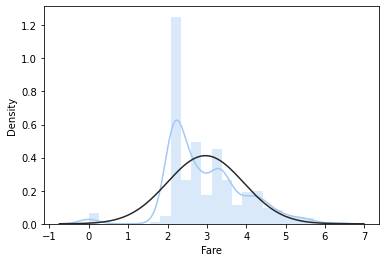

In [26]:
df['Fare'] = np.log1p(df['Fare'])
sns.distplot(df['Fare'], fit = norm)

Vamos a aplicar otra transformación a la variable, dado que no se entiende bien la vamos a transforma a categórica.
Como vemos que gráficamente va de aproximadamente el 0 al 7, hacemos el binning en 7 grupos:

In [27]:
df['fare_group'] = pd.qcut(df['Fare'], 7, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
df[['fare_group', 'Survived']].groupby(['fare_group'], as_index=False).mean()

,fare_group,Survived
0,A,0.207143
1,B,0.200000
2,C,0.316327
3,D,0.406250
4,E,0.445312
5,F,0.456000
6,G,0.685039


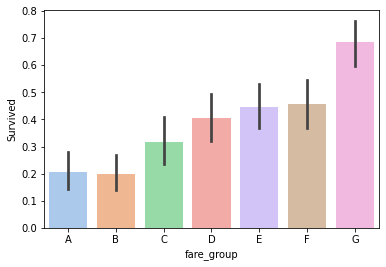

In [28]:
sns.barplot(x="fare_group", y="Survived", data=df)
df.drop(['Fare'], axis=1, inplace=True)

Vemos pues como anteriormente con la variable que contenía las _clases_, a mayor precio del billete mayor oportunidad de superviviencia dado que evidentemente los pasajes en primera clase, son más caros.

Este análisis pues no contradice el anterior que hemos hecho.

### Cabin

Leyendo la documentación y viendo impresiones por internet, los _NAN values_ de esta variable no son por falta de información, es porque en el trayecto había gente que no tenía cabina directamente y no se tiene datos de su localización.

Para que se pueda incluir esta variable en el modelo vamos a tener que realizar una transformación de la misma, vamos a binarizarla para que los nulls pasen a ser información útil.

Como en la anterior crearemos una variable nueva y eliminaremos la anterior.

In [29]:
df['in_cabin'] = ~df['Cabin'].isnull()

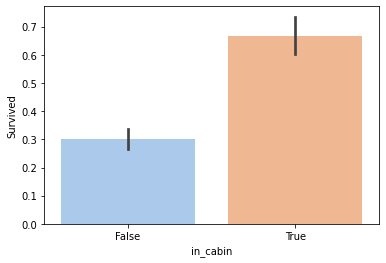

In [30]:
sns.barplot(x="in_cabin", y="Survived", data=df)
df.drop(['Cabin'], axis=1, inplace=True)

Vemos que disponer de cabina, aumenta las probabilidades de sobrevivir, suponemos que el no disponer de ella será indicativo de tener una clase baja que como hemos visto en anteriores análisis indicaba mayor índice de mortalidad.

### Embarqued

Variable categórica que indica el puerto de embarque:

+ C = Cherbourg
+ G = Queenstown
+ S = Southampton

In [31]:
df['Embarked'] = df['Embarked'].fillna('S')
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

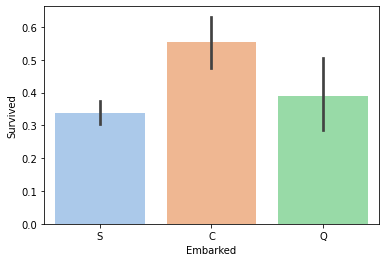

In [32]:
sns.barplot(x="Embarked", y="Survived", data=df)

Vemos que la gente de Cherbourg sobrevivión en mayor porcentaje, presuponemos que será porque en Francia hay un mayor nivel económico que en Inglaterra e Irlanda, eso o que los franceses son más habilidosos escapando de un barco.

## Creación de nuevas variables

Vamos a agrupar `SibSp` y `Parch`, dado que dan una información por separado que viene a ser lo mismo, la familia del pasajero, las vamos a juntar en una nueva variable que llamaremos __family_size__, será de caracter numérico.

In [33]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df[["family_size", "Survived"]].groupby(['family_size'], as_index=False).mean()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


<AxesSubplot:xlabel='family_size', ylabel='Survived'>

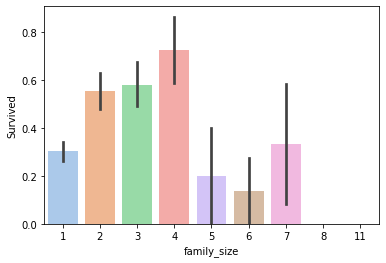

In [34]:
sns.barplot(x="family_size", y="Survived", data=df)

A colación de esta nueva variable, es interesante ver si el pasajero tiene o no familia en el barco, vamos a crear otra variable, esta vez binaria que llamaremos __is_alone__, donde tendremos representado con un 0 quien tiene familia y con un 1 quien no la tiene.

In [35]:
df['is_alone'] = 0
df.loc[df['family_size'] == 1, 'is_alone'] = 1
df[['is_alone', 'Survived']].groupby(['is_alone'], as_index=False).mean()

,is_alone,Survived
0,0,0.505650
1,1,0.303538


<AxesSubplot:xlabel='is_alone', ylabel='Survived'>

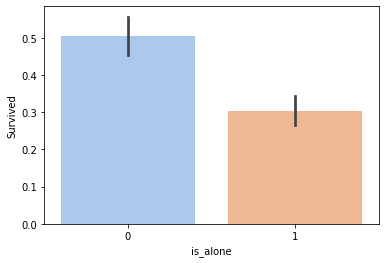

In [36]:
sns.barplot(x="is_alone", y="Survived", data=df)

Vemos que en el caso de esta variable, claramente hay una correlación entre la familia que tienes en el barco y tu supervivencia, por lo que podemos preveer que esta variable tendrá importancia en el análisis.

## Correlación entre las variables

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

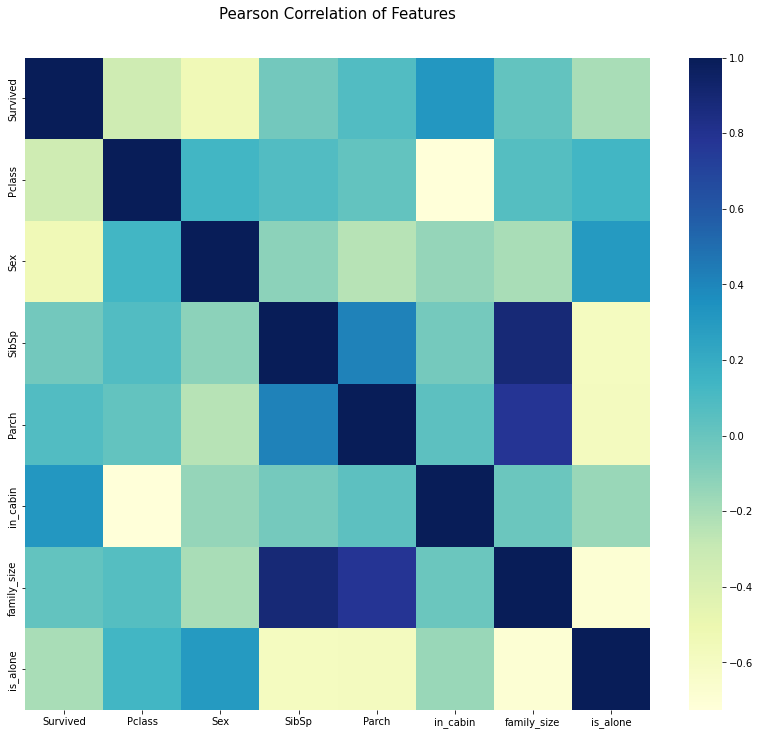

In [37]:
correlation_matrix = df.corr()
correlation_matrix

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, cmap='YlGnBu')

## One hot encoding de las variables categóricas

Es la última transformación que haremos antes de empezar a aplicar modelos.

In [38]:
cols = ['Pclass', 'Embarked', 'fare_group', 'age_group', 'Title']
titanic_categorical = df[cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
df = pd.concat([df[df.columns[~df.columns.isin(cols)]], titanic_categorical], axis=1)
df.head()

,Survived,Sex,SibSp,Parch,in_cabin,family_size,is_alone,Pclass_1,Pclass_2,Pclass_3,...,age_group_Teenager,age_group_Student,age_group_Young Adult,age_group_Adult,age_group_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,True,1,0,False,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,1,False,1,0,True,2,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,False,0,0,False,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,1,False,1,0,True,2,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,True,0,0,False,1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


## Modelización predictiva del conjunto de datos

Dado que no nos vamos a presentar el concurso, vamos a hacer el split sobre el conjunto de datos que hemos descargado como train y de ahí haremos todas las predicciones.

Empezamos por definir los conjuntos de entrenamiento y test:

In [39]:
X = df.drop('Survived', 1)
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Vamos a elegir un modelo que es muy potente para problemas de clasificación cómo el que tenemos aquí delante, dado que es un ensemble de árboles de decisión, lo que da robustez a sus resultados:

### Random Forest

In [41]:
# Creamos el clasificador, lo entrenamos y predecimos
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)

# Para poder ver el overfitting vamos a iterar por un rango de hiperparámetros que definimos aquí:

n_estimators_params = [10, 50, 100, 200]
max_depth_params = list(range(1, 10))

# Creamos un diccionario con los distintos hiperparámetros a testear
param_grid = dict(n_estimators=n_estimators_params, 
                  max_depth=max_depth_params)

# Definimos el rango del parámetro
grid = GridSearchCV(rnd_forest, param_grid, cv=4, scoring='accuracy', return_train_score=False,verbose=1)

# Hacemos un fitting en el modelo de grid para realizar la búsqueda
grid_search=grid.fit(X_train, y_train)

grid_search_results = pd.DataFrame(grid_search.cv_results_)

grid_mean_std = grid_search_results[['params','mean_test_score', 'std_test_score']]
print(f'\n Optimal hyperparameters = {grid_search.best_params_}')

Fitting 4 folds for each of 36 candidates, totalling 144 fits

 Optimal hyperparameters = {'max_depth': 6, 'n_estimators': 200}


In [45]:
# Realizamos de nuevo el modelo con los parámetros óptimos

rnd_forest = RandomForestClassifier(n_estimators=200, max_depth=6)
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)

score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Model accuracy = {score}')
print(f'Confusion matrix: \n {conf_matrix}')
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Model accuracy = 0.8097014925373134
Confusion matrix: 
 [[140  17]
 [ 34  77]]
Number of mislabeled points out of a total 268 points : 51


>1, train: 0.796, test: 0.772
>2, train: 0.788, test: 0.810
>3, train: 0.823, test: 0.813
>4, train: 0.844, test: 0.817
>5, train: 0.870, test: 0.817
>6, train: 0.875, test: 0.821
>7, train: 0.886, test: 0.821
>8, train: 0.894, test: 0.810
>9, train: 0.907, test: 0.817


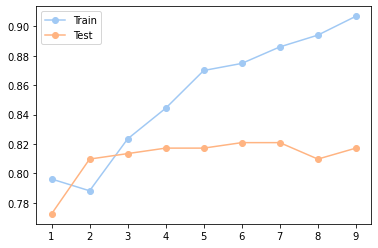

In [47]:
# Vamos a representar el overfitting

train_scores, test_scores = list(), list()
max_depth_values = list(range(1, 10))

# Iteramos por los valores de profundidad
for i in max_depth_values:
    model = RandomForestClassifier(n_estimators=50, max_depth=i)
    model.fit(X_train, y_train)
    
    # Evaluamos el conjunto de entrenamiento
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # Evaluamos el conjunto de test
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(max_depth_values, train_scores, '-o', label='Train')
plt.plot(max_depth_values, test_scores, '-o', label='Test')
plt.legend()

Vemos como a una profundidad de 6-7 el modelo alcanza su máximo scoring, sobrepasando esa cifra baja, por el contrario vemos como a mayor profundidad, mayor especialización del modelo sobre el conjunto de datos de entrenamiento.

No vamos a representar gráficamente el Random Forest dado que al ser un ensemble de árboles de decisión, su interpretación es muy compleja, lo que si vamos a hacer es ver la importancia de cada variable a la hora de realizar las predicciones:

                       importance
feature                          
Sex                      0.194912
Title_Mr                 0.186620
Pclass_3                 0.071055
Title_Mrs                0.065567
in_cabin                 0.056148
Title_Miss               0.051420
family_size              0.047565
SibSp                    0.028521
Pclass_1                 0.025883
Pclass_2                 0.024291
age_group_Baby           0.023626
Parch                    0.021212
fare_group_G             0.019317
Embarked_S               0.018210
Embarked_C               0.017493
fare_group_F             0.016048
Title_Master             0.012347
fare_group_A             0.011587
is_alone                 0.011470
age_group_Young Adult    0.011377
Title_Other              0.009971
age_group_Adult          0.009913
fare_group_B             0.009697
age_group_Unknown        0.009098
Embarked_Q               0.007923
fare_group_D             0.007198
fare_group_C             0.007076
fare_group_E  

<AxesSubplot:xlabel='feature'>

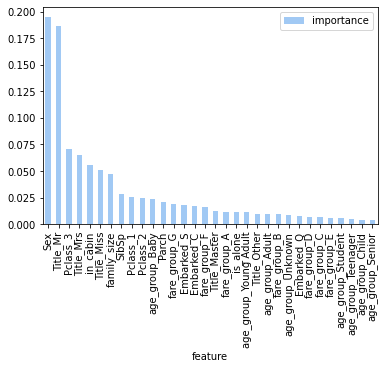

In [48]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rnd_forest.feature_importances_,6)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)
importances.plot.bar() 

Vemos pues lo visto en el análisis exploratorio, el sexo es la variable que más importancia tuvo a la hora de sobrevivir en el desastre del Titánic, vemos como también no estar solo y rodeado de familia influye positivamente.

En un caso real deberíamos ir comparando scoring con más modelos y haciendo un fine tunning del modelo en mayor profundidad, pero no son del alcance de esta práctica, de manera muy rápida vamos a comparar con otro gran modelo sin entrar en tanta profundidad como en el anterior para ver si superamos el scoring del __80%__ que nos ha dado Random Forest.

### Support Vector Machines

In [52]:
svm = SVC(C=0.1, gamma=1, probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Model accuracy = {score}')
print(f'Confusion matrix: \n {conf_matrix}')
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Model accuracy = 0.585820895522388
Confusion matrix: 
 [[157   0]
 [111   0]]
Number of mislabeled points out of a total 268 points : 111


Vemos sin embargo como el accuracy de SVM es mucho menor en este caso, dando solo una precisión del __58 %__, por lo que elegiríamos el modelo anterior para realizar nuestras predicciones.